In [1]:
from glob import glob 
from fastcore.xtras import load_pickle
import pandas as pd 

from scipy.stats import sem

import matplotlib.pyplot as plt

In [3]:
all_results = glob('reports/*.pkl')

In [4]:
all_results = [load_pickle(f) for f in all_results]

In [6]:
compiled_results = []

for res in all_results: 
    selected_results = {}
    selected_results['target'] = res['target']
    selected_results['num_train_points'] = res['num_train_points']
    selected_results['num_test_points'] = res['num_test_points']
    selected_results['random_undersample'] = res['random_undersample']
    # 'roc_auc', 'f1_macro', 'f1_micro', 'frac_valid',
    selected_results['roc_auc'] = res['roc_auc']
    selected_results['f1_macro'] = res['f1_macro']
    selected_results['f1_micro'] = res['f1_micro']
    selected_results['accuracy'] = res['accuracy']
    selected_results['acc_macro'] = res['acc_macro']
    selected_results['kappa'] = res['kappa']
    selected_results['num_epochs'] = res['n_epochs'] if 'n_epochs' in res else 8
    selected_results['short_name'] = res['short_name'] if 'short_name' in res else False

    compiled_results.append(selected_results)

In [7]:
compiled_results = pd.DataFrame(compiled_results)

In [9]:
compiled_results['roc_auc'].mean()

0.5485757098591845

(array([ 4.,  1., 62., 34., 18.,  6.,  7.,  3.,  4.,  3.]),
 array([0.41794822, 0.45456123, 0.49117424, 0.52778726, 0.56440027,
        0.60101328, 0.63762629, 0.67423931, 0.71085232, 0.74746533,
        0.78407834]),
 <BarContainer object of 10 artists>)

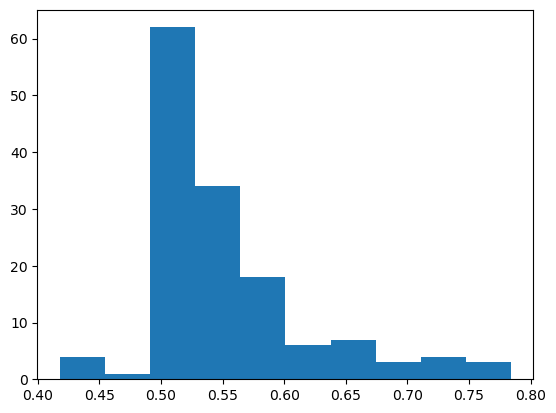

In [8]:
plt.hist(compiled_results['roc_auc'])

In [15]:
compiled_results.query('short_name == True')

,target,num_train_points,num_test_points,random_undersample,roc_auc,f1_macro,f1_micro,accuracy,acc_macro,kappa,num_epochs,short_name
6,NR-AhR,100,500,False,0.498856,0.465812,0.872000,0.872000,0.872000,-0.003953,8,True
7,NR-PPAR-gamma,6264,500,False,0.498973,0.492901,0.972000,0.972000,0.972000,-0.003728,8,True
9,SR-ATAD5,10,500,False,0.500000,0.491353,0.966000,0.966000,0.966000,0.000000,8,True
17,NR-AR-LBD,6000,500,False,0.664617,0.717131,0.980000,0.980000,0.980000,0.435411,8,True
18,NR-ER-LBD,10,500,False,0.500000,0.492355,0.969880,0.969880,0.969880,0.000000,8,True
20,SR-ARE,6264,500,False,0.529020,0.526207,0.834000,0.834000,0.834000,0.081858,8,True
24,NR-PPAR-gamma,6000,500,False,0.498971,0.492386,0.970000,0.970000,0.970000,-0.003747,8,True
26,NR-AR-LBD,10,500,False,0.500000,0.493388,0.973896,0.973896,0.973896,0.000000,8,True
30,NR-Aromatase,6264,500,False,0.562168,0.586971,0.926000,0.926000,0.926000,0.187170,8,True
32,NR-Aromatase,10,500,False,0.500000,0.483471,0.936000,0.936000,0.936000,0.000000,8,True


In [6]:
compiled_results.groupby(['target', 'num_epochs', 'num_train_points', 'random_undersample', 'short_name']).agg(['mean', 'std', sem, 'count'])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

num_test_points  \
                                                                              mean   
target   num_epochs num_train_points random_undersample short_name                   
NR-AR    8          10               False              False                500.0   
                                                        True                 500.0   
                                     True               False                500.0   
                    50               True               False                500.0   
                    100              False              False                500.0   
...                                                                            ...   
SR-ATAD5 8          6264             False              True                 500.0   
         16         10               False              False                500.0   
                    100              False              False                500.0   
                    6000             False              False                500.0   
                    6264             False              False                500.0   

                                                                              \
                                                                    std  sem   
target   num_epochs num_train_points random_undersample short_name             
NR-AR    8          10               False              False       0.0  0.0   
                                                        True        NaN  NaN   
                                     True               False       0.0  0.0   
                    50               True               False       0.0  0.0   
                    100              False              False       NaN  NaN   
...                                                                 ...  ...   
SR-ATAD5 8          6264             False              True        0.0  0.0   
         16         10               False              False       0.0  0.0   
                    100              False              False       NaN  NaN   
                    6000             False              False       NaN  NaN   
                    6264             False              False       NaN  NaN   

                                                                          \
                                                                   count   
target   num_epochs num_train_points random_undersample short_name         
NR-AR    8          10               False              False          2   
                                                        True           1   
                                     True               False          2   
                    50               True               False          3   
                    100              False              False          1   
...                                                                  ...   
SR-ATAD5 8          6264             False              True           2   
         16         10               False              False          2   
                    100              False              False          1   
                    6000             False              False          1   
                    6264             False              False          1   

                                                                     roc_auc  \
                                                                        mean   
target   num_epochs num_train_points random_undersample short_name             
NR-AR    8          10               False              False       0.500000   
                                                        True        0.532622   
                                     True               False       0.582031   
                    50               True               False       0.591849   
                    100              False              False       0.574122   
...                                 

In [7]:
# 16 epoch subset 

compiled_results.loc[(compiled_results['num_epochs'] == 16)]

,target,num_train_points,num_test_points,random_undersample,roc_auc,f1_macro,f1_micro,accuracy,acc_macro,kappa,num_epochs,short_name
1,SR-ARE,6000,500,False,0.556047,0.564374,0.824,0.824,0.824,0.142334,16,False
2,SR-ATAD5,10,500,False,0.500000,0.490316,0.962,0.962,0.962,0.000000,16,False
11,SR-ATAD5,10,500,False,0.500000,0.488229,0.954,0.954,0.954,0.000000,16,False
55,SR-ATAD5,100,500,False,0.495825,0.487179,0.950,0.950,0.950,-0.013623,16,False
68,SR-ARE,100,500,False,0.498818,0.457701,0.844,0.844,0.844,-0.003964,16,False
71,NR-PPAR-gamma,6264,500,False,0.500000,0.493414,0.974,0.974,0.974,0.000000,16,False
77,SR-ATAD5,6264,500,False,0.517682,0.522340,0.948,0.948,0.948,0.058517,16,False
81,SR-ARE,10,500,False,0.500000,0.457112,0.842,0.842,0.842,0.000000,16,False
92,SR-ARE,6264,500,False,0.543922,0.549043,0.822,0.822,0.822,0.111776,16,False
126,SR-ATAD5,6000,500,False,0.495842,0.488229,0.954,0.954,0.954,-0.013394,16,False


In [8]:
# 16 epoch subset 

compiled_results.loc[(compiled_results['num_epochs'] == 8) & (compiled_results['target'] == 'SR-ARE')]

,target,num_train_points,num_test_points,random_undersample,roc_auc,f1_macro,f1_micro,accuracy,acc_macro,kappa,num_epochs,short_name
20,SR-ARE,6264,500,False,0.529020,0.526207,0.834000,0.834000,0.834000,0.081858,8,True
21,SR-ARE,100,500,True,0.540784,0.502664,0.630000,0.630000,0.630000,0.053224,8,False
38,SR-ARE,6000,500,False,0.537862,0.538909,0.818000,0.818000,0.818000,0.101501,8,True
57,SR-ARE,6000,500,False,0.558866,0.570116,0.848000,0.848000,0.848000,0.160332,8,True
58,SR-ARE,10,500,True,0.528685,0.257810,0.258586,0.258586,0.258586,0.020130,8,False
63,SR-ARE,10,500,False,0.500000,0.463362,0.863454,0.863454,0.863454,0.000000,8,True
79,SR-ARE,100,500,False,0.526874,0.527847,0.802000,0.802000,0.802000,0.065403,8,True
82,SR-ARE,100,500,False,0.505711,0.482798,0.846000,0.846000,0.846000,0.017957,8,False
100,SR-ARE,6264,500,False,0.545074,0.550822,0.834000,0.834000,0.834000,0.119270,8,True
105,SR-ARE,100,500,False,0.546884,0.550562,0.824000,0.824000,0.824000,0.102444,8,True


In [9]:
# 4 epoch subset 

compiled_results.loc[(compiled_results['num_epochs'] == 4)]

,target,num_train_points,num_test_points,random_undersample,roc_auc,f1_macro,f1_micro,accuracy,acc_macro,kappa,num_epochs,short_name
27,SR-ATAD5,6264,500,False,0.5,0.491353,0.966000,0.966000,0.966000,0.0,4,False
31,SR-ATAD5,100,500,False,0.5,0.487179,0.950000,0.950000,0.950000,0.0,4,False
50,SR-ATAD5,10,500,False,0.5,0.484404,0.939502,0.939502,0.939502,0.0,4,False
102,SR-ATAD5,6000,500,False,0.5,0.488229,0.954000,0.954000,0.954000,0.0,4,False
